In [1]:
import os
import zipfile
import json
import pandas as pd

In [2]:
from sklearn.preprocessing import LabelEncoder


In [3]:
Training_raw_path = 'C:/Users/user/Desktop/과제/data/146.낚시성 기사 탐지 데이터/01.정식개방데이터/Training/01.원천데이터/'
Training_labeling_path = 'C:/Users/user/Desktop/과제/data/146.낚시성 기사 탐지 데이터/01.정식개방데이터/Training/02.라벨링데이터/'
Validation_raw_path = 'C:/Users/user/Desktop/과제/data/146.낚시성 기사 탐지 데이터/01.정식개방데이터/Validation/01.원천데이터/'
Validation_labeling_path = 'C:/Users/user/Desktop/과제/data/146.낚시성 기사 탐지 데이터/01.정식개방데이터/Validation/02.라벨링데이터/'

In [4]:
Training_raw_list = []
Training_labeling_list = []
Validation_raw_list = []
Validation_labeling_list = []


# 데이터 다 읽어오는 함수
# 근데 AI 허브 홈페이지에서랑 내가 읽는 파일의 갯수랑 다르다...
def process_read_file(directory_path, data_list):
    for file_name in os.listdir(directory_path):
        if file_name.endswith('.zip'):
            zip_file_path = os.path.join(directory_path, file_name)

            with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
                # ZIP 파일 내의 모든 파일 목록
                file_list = zip_ref.namelist()

                # 각 JSON 파일에 접근
                for file_name in file_list:
                    # JSON 파일인 경우에만 처리
                    if file_name.endswith('.json'):
                        with zip_ref.open(file_name) as json_file:
                            # JSON 파일 읽기
                            json_data = json.load(json_file)

                            # 필요한 정보에 접근
                            news_id = json_data['sourceDataInfo']['newsID'] #뉴스 파일 아이디
                            news_type = json_data['sourceDataInfo']["useType"] #  1 = 낚시성,  2 = 비낚시성
                            news_title = json_data['sourceDataInfo']['newsTitle']
                            news_content = json_data['sourceDataInfo']['newsContent']
                            news_category = json_data['sourceDataInfo']['newsCategory']
                            news_sentence_count = json_data['sourceDataInfo']['sentenceCount']
                            news_pattern = json_data['sourceDataInfo']['processPattern']
                            
                            
                            #라벨링 데이터는 'clickbaitClass 추가'
                            if 'labeledDataInfo' in json_data and 'clickbaitClass' in json_data['labeledDataInfo']:
                                clickbaitClass = json_data['labeledDataInfo']['clickbaitClass']
                                
                                data_list.append({
                                    'FileName': news_id,
                                    'NewsType' : news_type,
                                    'NewsTitle': news_title,
                                    'NewsCategory' : news_category,
                                    'NewsContent': news_content,
                                    'SentenceCount' : news_sentence_count,
                                    'clickbaitClass' : clickbaitClass,
                                    'newsPattern' : news_pattern,
                                })
                            #raw 데이터
                            else:
                                data_list.append({
                                    'FileName': news_id,
                                    'NewsType' : news_type,
                                    'NewsTitle': news_title,
                                    'NewsCategory' : news_category,
                                    'NewsContent': news_content,
                                    'SentenceCount' : news_sentence_count,
                                    'newsPattern' : news_pattern,
                                })
                            


In [5]:
#process_read_file(Training_raw_path, Training_raw_list)
process_read_file(Training_labeling_path, Training_labeling_list)
#process_read_file(Validation_raw_path, Validation_raw_list)
#process_read_file(Validation_labeling_path, Validation_labeling_list)

In [6]:
# 각 데이터를 df로 만들어 주기
#Training_raw_df = pd.DataFrame(Training_raw_list)
Training_labeling_df = pd.DataFrame(Training_labeling_list)
#Validation_raw_df = pd.DataFrame(Validation_raw_list)
#Validation_labeling_df = pd.DataFrame(Validation_labeling_list)

In [7]:
#   AI 허브에서의 데이터 갯수 raw part1 = 364,333, raw part2 = 369,094, validate part1 = 364,333, validate part1 = 369,094
# 완전 다르쥬..
#print(len(Training_raw_df), len(Training_labeling_df), len(Validation_raw_df), len(Validation_labeling_df))
print(len(Training_labeling_df))

586741


In [8]:
pattern_counts = Training_labeling_df['newsPattern'].value_counts()
print(pattern_counts)

# 00 = 비낚시성인니까 패턴이 없음, 99 = 낚시성인데 뭔 패턴인지 모름 ... 나머지는 뭐 다 나와있음

newsPattern
00    290693
99    215833
24     16215
11     14863
12     11685
23      9856
21      9145
22      4893
15      4228
14      3696
13      3554
16      2080
Name: count, dtype: int64


In [9]:
# 데이터프레임 딴거로 카피
dff = Training_labeling_df.copy()
print(len(dff))

586741


In [10]:
#라벨링
label_encoder = LabelEncoder()
dff['newsPattern'] = label_encoder.fit_transform(dff['newsPattern'])

# 각 숫자에 대응하는 원래 클래스 확인
pattern_classes = label_encoder.classes_
print(pattern_classes)


['00' '11' '12' '13' '14' '15' '16' '21' '22' '23' '24' '99']


In [11]:
dff_pattern_counts = dff['newsPattern'].value_counts()
print(dff_pattern_counts)

# 0 => 00 / 1 => 11 / 2 => 12 / 3 => 13 / 4 => 14 / 5 => 15 / 6 => 16 / 7 => 21 / 8 => 22 / 9 => 23 / 10 => 24 / 11 => 99

newsPattern
0     290693
11    215833
10     16215
1      14863
2      11685
9       9856
7       9145
8       4893
5       4228
4       3696
3       3554
6       2080
Name: count, dtype: int64


In [12]:
sampled_data = dff.sample(frac=0.1, random_state=42)

len(sampled_data)

58674

In [13]:
asd = sampled_data['newsPattern'].value_counts()
print(asd)

# 0 => 00 / 1 => 11 / 2 => 12 / 3 => 13 / 4 => 14 / 5 => 15 / 6 => 16 / 7 => 21 / 8 => 22 / 9 => 23 / 10 => 24 / 11 => 99

newsPattern
0     28897
11    21654
10     1654
1      1543
2      1156
9       971
7       964
8       489
5       398
4       374
3       346
6       228
Name: count, dtype: int64


In [20]:
from tqdm import tqdm
from konlpy.tag import Okt
# Okt 객체 생성
okt = Okt()

# 형태소 분석을 데이터프레임에 적용
tqdm.pandas()  # tqdm을 사용하여 진행 바를 표시합니다.
sampled_data['morphs'] = sampled_data['NewsContent'].progress_apply(lambda x: okt.morphs(x))


100%|██████████████████████████████████████████████████████████████████████████| 58674/58674 [2:09:15<00:00,  7.57it/s]


In [14]:
from sklearn.model_selection import train_test_split
sampled_train, sampled_test = train_test_split(sampled_data, test_size=0.25, random_state=0)

print(len(sampled_train)) # 59604 출력
print(len(sampled_test)) # 19869 출력

44005
14669


In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 토큰화 및 패딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sampled_train['NewsContent'])
total_words = len(tokenizer.word_index) + 1

input_sequences_train = tokenizer.texts_to_sequences(sampled_train['NewsContent'])
input_sequences_test = tokenizer.texts_to_sequences(sampled_test['NewsContent'])

# 최대 시퀀스 길이를 찾기
max_sequence_length = max(
    max(len(seq) for seq in input_sequences_train),
    max(len(seq) for seq in input_sequences_test)
)

# 시퀀스에 패딩 추가
padded_sequences_train = pad_sequences(input_sequences_train, maxlen=max_sequence_length, padding='post')
padded_sequences_test = pad_sequences(input_sequences_test, maxlen=max_sequence_length, padding='post')


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Flatten

from tensorflow.keras.utils import to_categorical

# 모델 구성
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

clickbait_model = Sequential()
clickbait_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
clickbait_model.add(LSTM(128))
clickbait_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# 모델 컴파일
clickbait_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train_one_hot = to_categorical(sampled_train['newsPattern'].values, num_classes=len(label_encoder.classes_))
y_test_one_hot = to_categorical(sampled_test['newsPattern'].values, num_classes=len(label_encoder.classes_))

clickbait_model.fit(padded_sequences_train, y_train_one_hot, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5


1101/1101 [==============================] - 1125s 1s/step - loss: 1.2938 - accuracy: 0.4935 - val_loss: 1.2867 - val_accuracy: 0.4926
Epoch 2/5
1101/1101 [==============================] - 1133s 1s/step - loss: 1.2834 - accuracy: 0.4940 - val_loss: 1.2869 - val_accuracy: 0.4926
Epoch 3/5
1101/1101 [==============================] - 1145s 1s/step - loss: 1.2823 - accuracy: 0.4974 - val_loss: 1.2863 - val_accuracy: 0.4926
Epoch 4/5
1101/1101 [==============================] - 1135s 1s/step - loss: 1.2820 - accuracy: 0.4974 - val_loss: 1.2846 - val_accuracy: 0.4926
Epoch 5/5
1101/1101 [==============================] - 1142s 1s/step - loss: 1.2812 - accuracy: 0.4974 - val_loss: 1.2845 - val_accuracy: 0.4926


In [20]:
# 테스트 데이터와 레이블 준비
X_test = padded_sequences_test
y_test = sampled_test['newsPattern'].values

# 모델 평가
loss, accuracy = clickbait_model.evaluate(X_test, to_categorical(y_test, num_classes=len(label_encoder.classes_)))
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

459/459 [==============================] - 63s 137ms/step - loss: 1.2967 - accuracy: 0.4806
Test Loss: 1.2967
Test Accuracy: 0.4806


459/459 [==============================] - 64s 140ms/step


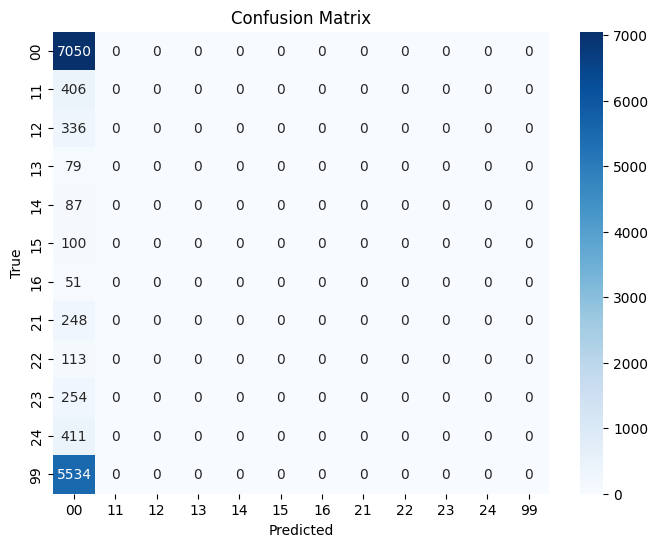

              precision    recall  f1-score   support

          00       0.48      1.00      0.65      7050
          11       0.00      0.00      0.00       406
          12       0.00      0.00      0.00       336
          13       0.00      0.00      0.00        79
          14       0.00      0.00      0.00        87
          15       0.00      0.00      0.00       100
          16       0.00      0.00      0.00        51
          21       0.00      0.00      0.00       248
          22       0.00      0.00      0.00       113
          23       0.00      0.00      0.00       254
          24       0.00      0.00      0.00       411
          99       0.00      0.00      0.00      5534

    accuracy                           0.48     14669
   macro avg       0.04      0.08      0.05     14669
weighted avg       0.23      0.48      0.31     14669



C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 예측값 생성
y_pred_one_hot = clickbait_model.predict(X_test)
# 각 예측값에서 가장 높은 확률을 가진 클래스 선택
y_pred_encoded = y_pred_one_hot.argmax(axis=1)

# 실제값과 예측값으로 컨퓨전 매트릭스 생성
conf_matrix = confusion_matrix(sampled_test['newsPattern'], y_pred_encoded)  # 여기서 sampled_test로 수정
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 분류 보고서 출력
print(classification_report(sampled_test['newsPattern'], y_pred_encoded, target_names=label_encoder.classes_))  # 여기서 sampled_test로 수정
